---
MAT421 - Applied Computational Methods

Arizona State University

Homework #10

Written by Edward Hayes

---
This notebook is a review and an elaboration of the topics covered in Chapter 21 from *Python Programming and Numerical Methods - A Guide for Engineers and Scientists*.

---
# Chapter 21. Numerical Integration
---

## 21.4 Simpson's Rule

Simpson's Rule uses two subintervals, $[x_{i-1},x_i]$ and $[x
_i,x_{i+1}]$, with step size , $h$, to approximate the area under $f(x)$. It does this by fitting a quadratic polynomial across the subintervals and then integrating the quadratic polynomial exactly.

The quadratic polynomial is often approximated using Lagrange Polynomial Interpolation.

Using Lagrange, $P(x)$, with some algebraic manipulation, the integral over any two subintervals is given as,

$$\int_{x_{i-1}}^{x_{i+1}}P_i(x)dx=\frac{h}{3}(f(x_{i-1})+4f(x_i)+f(x_{i+1}))$$

Summing the subinterval integrals from $a$ to $b$ gives the integral of $f(x)$,

$$\int_a^bf(x)dx≈\frac{h}{3}[f(x_0)+4(\sum_{i=1,i odd}^{n-1}f(x_i))+2(\sum_{i=2,i even}^{n-2}f(x_i))+f(x_n)]$$

Note that there must be an **even** number of subintervals.

Simpson's Rule is more accurate than the Riemann and Trapezoid methods.


Actual Integral:  2.0
Riemann Midpoint:  2.0057230150235816
Error:  0.005723015023581635
Trapezoid:  1.9885637765843156
Error:  0.011436223415684399
Simpsons:  2.0000526243411856
Error:  5.26243411855809e-05 



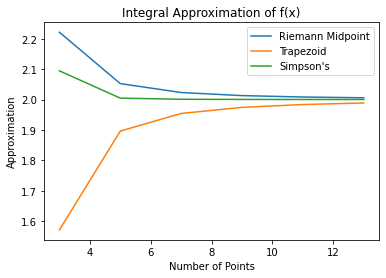

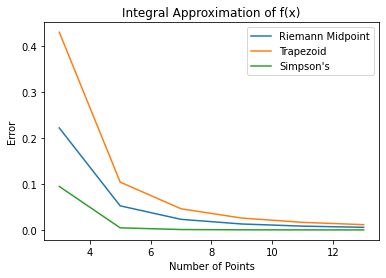

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def grid(a,b,n):
  h = (b-a)/(n-1)
  x = np.linspace(a,b,n)
  return h,x

def riemann_midpoint(func,a,b,n):
  h,x = grid(a,b,n)
  return h*sum(func((x[0:n-1]+x[1:n])/2))

def trapezoid(func,a,b,n):
  h,x = grid(a,b,n)
  return (h/2)*(func(x[0])+2*sum(func(x[1:n-1]))+f(x[n-1]))

def simpsons(func,a,b,n):
  h,x = grid(a,b,n)
  return (h/3)*(func(x[0])+4*sum(func(x[1:n-1:2]))\
                +2*sum(func(x[0:n-2:2]))+func(x[n-1]))

start_point = 0
end_point = np.pi

f = lambda x: np.sin(x)

f_int = lambda x: -np.cos(x)

act_int = f_int(end_point)-f_int(start_point)

print('Actual Integral: ',act_int)

r_midpoint = []
i_trapezoid = []
i_simpsons = []

r_midpoint_error = []
i_trapezoid_error = []
i_simpsons_error = []

i = 0

error = 5
num_of_points = []
num_of_points.append(3)

while error > 0.0001:

  r_midpoint.append(riemann_midpoint(f,start_point,end_point,num_of_points[i]))
  r_midpoint_error.append(abs(act_int-r_midpoint[i]))
  i_trapezoid.append(trapezoid(f,start_point,end_point,num_of_points[i]))
  i_trapezoid_error.append(abs(act_int-i_trapezoid[i]))
  i_simpsons.append(simpsons(f,start_point,end_point,num_of_points[i]))
  i_simpsons_error.append(abs(act_int-i_simpsons[i]))

  error = i_simpsons_error[i]
  num_of_points.append(num_of_points[i]+2)
  i += 1

num_of_points.pop()
i -= 1

print('Riemann Midpoint: ',r_midpoint[i])
print('Error: ',r_midpoint_error[i])
print('Trapezoid: ',i_trapezoid[i])
print('Error: ',i_trapezoid_error[i])
print('Simpsons: ',i_simpsons[i])
print('Error: ',i_simpsons_error[i],'\n')

plt.plot(num_of_points,r_midpoint,label='Riemann Midpoint')
plt.plot(num_of_points,i_trapezoid,label='Trapezoid')
plt.plot(num_of_points,i_simpsons,label="Simpson's")
plt.title('Integral Approximation of f(x)')
plt.xlabel('Number of Points')
plt.ylabel('Approximation')
plt.legend()
plt.show()

print('\n')

plt.plot(num_of_points,r_midpoint_error,label='Riemann Midpoint')
plt.plot(num_of_points,i_trapezoid_error,label='Trapezoid')
plt.plot(num_of_points,i_simpsons_error,label="Simpson's")
plt.title('Integral Approximation of f(x)')
plt.xlabel('Number of Points')
plt.ylabel('Error')
plt.legend()
plt.show()

## 21.5 Computing Integrals in Python

The scipy.integrate subpackage offers many functions for integration. Some include trapezoid, cumulative trapezoid, and general purpose functions for single, double & triple integrals.

In [2]:

from scipy.integrate import quad
from scipy.integrate import trapz
import matplotlib.pyplot as plt

def grid(a,b,n):
  h = (b-a)/(n-1)
  x = np.linspace(a,b,n)
  return h,x

def riemann_midpoint(func,a,b,n):
  h,x = grid(a,b,n)
  return h*sum(func((x[0:n-1]+x[1:n])/2))

def trapezoid(func,a,b,n):
  h,x = grid(a,b,n)
  return (h/2)*(func(x[0])+2*sum(func(x[1:n-1]))+f(x[n-1]))

def simpsons(func,a,b,n):
  h,x = grid(a,b,n)
  return (h/3)*(func(x[0])+4*sum(func(x[1:n-1:2]))\
                +2*sum(func(x[0:n-2:2]))+func(x[n-1]))

a = 0
b = np.pi
n = 11

x = np.linspace(a,b,n)

f = lambda x: np.sin(x)
f_int = lambda x: -np.cos(x)

act_int = f_int(b)-f_int(a)

riemann = riemann_midpoint(f,a,b,n)
trapezoid1 = trapezoid(f,a,b,n)
simpsons = simpsons(f,a,b,n)
trapezoid2 = trapz(np.sin(x),x)
i_quad, i_quad_error = quad(f,a,b)

print('Actual Integral: ',act_int,'\n')
print('Riemann Midpoint: ',riemann)
print('Error: ',act_int-riemann)
print('Python General Quad: ',i_quad)
print('Error : ',act_int-i_quad)
print('Trapezoid: ',trapezoid1)
print('Error: ',act_int-trapezoid1)
print('Python Trapezoid: ',trapezoid2)
print('Error: ',act_int-trapezoid2)
print('Simpsons: ',simpsons)
print('Error: ',act_int-simpsons)

Actual Integral:  2.0 

Riemann Midpoint:  2.0082484079079745
Error:  -0.008248407907974542
Python General Quad:  2.0
Error :  0.0
Trapezoid:  1.9835235375094546
Error:  0.01647646249054535
Python Trapezoid:  1.9835235375094544
Error:  0.016476462490545574
Simpsons:  2.0001095173150043
Error:  -0.00010951731500430384
